### Missing data values

Trying to characterize the missingness of the data in a very simple way.

In [2]:
import pandas as pd
import numpy as np

survey_data = pd.read_csv("https://raw.githubusercontent.com/samtalasila/e-bike-survey-response-results/master/E-Bike_Survey_Responses.csv")
print(survey_data.shape)

(2238, 22)


In [13]:
# take a summary of how many missing values appear in the rows versus columns
missing_values_rows = survey_data.isna().sum(axis=1)
missing_values_cols = survey_data.isna().sum(axis=0)
missing_values_total_sum = survey_data.isna().sum()

(2238,)
(22,)
135


/Users/zamparol/anaconda36/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


The sixth feature is missing much moreso than usual:  What is your household income?
Minor missing effects by column also observed for features: 
Sex 
 What level of education have you reached? 
 Which category best describes your employment?


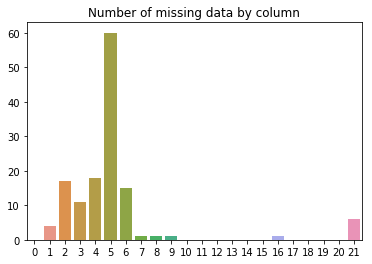

In [30]:
# plot the number of missing data by column
%matplotlib inline
import seaborn as sns
colnames = [name for name, value in missing_values_cols.items()]
values = [value for name, value in missing_values_cols.items()]

p = sns.barplot([a for a in range(len(colnames))], values)
p.set_title("Number of missing data by column")
print("The sixth feature is missing much moreso than usual: ", colnames[5])
print("Minor missing effects by column also observed for features: ")
print(colnames[2],"\n",colnames[4],"\n",colnames[6])

/Users/zamparol/anaconda36/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Number of missing data by row with at least one non-zero value')

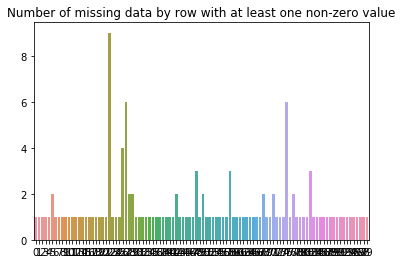

In [26]:
# for those rows with any missing data, plot the numbe of missing data by row
missing_values_rows_nonzero = missing_values_rows[missing_values_rows > 0]
colnames = [name for name, value in missing_values_rows_nonzero.items()]
values = [value for name, value in missing_values_rows_nonzero.items()]

p = sns.barplot([a for a in range(len(colnames))], values)
p.set_title("Number of missing data by row with at least one non-zero value")